In [2]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import f1_score, auc,roc_auc_score, roc_curve
import shap
df = pd.read_csv('C:/Users/m/Desktop/Thesis Tasks/Jupyter Lab/Mental Health/Mental health 2Class.csv')

In [3]:
# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [4]:
def generate_auc_roc_curve(clf, x_test):
    y_pred_proba = clf.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    print(auc)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

In [5]:
df

,Gender,Worry_about_social_support_during_covid19,Residence,Stable_family_income,Living_with_parents,Relative_or_acquaintance_infected_with_covid19,Worry_about_academic_delay,Disruption_of_daily_life,Exercise_during_covid19,Own_income,Quarrel_between_parents,Sleep_status_hour_during_covid19,Internet_browsing_hours_during_covid19,Fear_of_getting_infected_with_covid19,Mental_Health_Status
0,Male,Yes,Urban,No,Yes,Yes,Yes,Yes,No,Yes,No,2,3,Yes,Better
1,Male,Yes,Rural,Yes,Yes,Yes,Yes,Yes,No,No,No,2,4,Yes,Better
2,Male,Yes,Urban,Yes,No,Yes,Yes,Yes,No,No,Absent,1,3,Yes,Better
3,Female,Yes,Urban,Yes,Yes,No,Yes,Yes,No,No,Yes,2,3,Yes,Poor
4,Male,Yes,Urban,Yes,Yes,No,Yes,Yes,No,No,No,3,4,Yes,Better
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,Male,Yes,Urban,Yes,Yes,Yes,Yes,Yes,Yes,No,No,1,4,Yes,Better
249,Male,Yes,Rural,No,Yes,Yes,Yes,Yes,No,No,No,2,3,Yes,Better
250,Male,No,Urban,Yes,Yes,No,Yes,Yes,No,No,No,2,3,Yes,Better
251,Male,Yes,Rural,No,No,No,Yes,Yes,No,No,No,2,4,Yes,Poor


In [6]:
df.isnull().sum()

Gender                                            0
Worry_about_social_support_during_covid19         0
Residence                                         0
Stable_family_income                              0
Living_with_parents                               0
Relative_or_acquaintance_infected_with_covid19    0
Worry_about_academic_delay                        0
Disruption_of_daily_life                          0
Exercise_during_covid19                           0
Own_income                                        0
Quarrel_between_parents                           0
Sleep_status_hour_during_covid19                  0
Internet_browsing_hours_during_covid19            0
Fear_of_getting_infected_with_covid19             0
Mental_Health_Status                              0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 15 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Gender                                          253 non-null    object
 1   Worry_about_social_support_during_covid19       253 non-null    object
 2   Residence                                       253 non-null    object
 3   Stable_family_income                            253 non-null    object
 4   Living_with_parents                             253 non-null    object
 5   Relative_or_acquaintance_infected_with_covid19  253 non-null    object
 6   Worry_about_academic_delay                      253 non-null    object
 7   Disruption_of_daily_life                        253 non-null    object
 8   Exercise_during_covid19                         253 non-null    object
 9   Own_income                                      253 no

# Output column unique value

In [8]:
df.Mental_Health_Status.value_counts()

Better    166
Poor       87
Name: Mental_Health_Status, dtype: int64

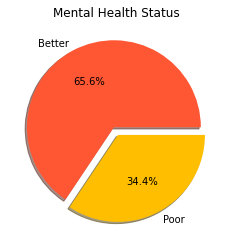

In [9]:
plt.pie(df.Mental_Health_Status.value_counts(), labels = ['Better','Poor'],colors = ['#FF5733','#FFBF00'],autopct='%1.1f%%',shadow=True, explode=(0.05, 0.05))
plt.title('Mental Health Status')
plt.show()

In [10]:
# print_unique_col_values(df)

# Label Encoding

In [11]:
label_encoder =  preprocessing.LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Worry_about_social_support_during_covid19'] = label_encoder.fit_transform(df['Worry_about_social_support_during_covid19'])
df['Residence'] = label_encoder.fit_transform(df['Residence'])
df['Stable_family_income'] = label_encoder.fit_transform(df['Stable_family_income'])
df['Living_with_parents'] = label_encoder.fit_transform(df['Living_with_parents'])
df['Relative_or_acquaintance_infected_with_covid19'] = label_encoder.fit_transform(df['Relative_or_acquaintance_infected_with_covid19'])
df['Worry_about_academic_delay'] = label_encoder.fit_transform(df['Worry_about_academic_delay'])
df['Disruption_of_daily_life'] = label_encoder.fit_transform(df['Disruption_of_daily_life'])
df['Exercise_during_covid19'] = label_encoder.fit_transform(df['Exercise_during_covid19'])
df['Own_income'] = label_encoder.fit_transform(df['Own_income'])
df['Quarrel_between_parents'] = label_encoder.fit_transform(df['Quarrel_between_parents'])
df['Fear_of_getting_infected_with_covid19'] = label_encoder.fit_transform(df['Fear_of_getting_infected_with_covid19'])
df['Mental_Health_Status'] = label_encoder.fit_transform(df['Mental_Health_Status'])

In [12]:
df

,Gender,Worry_about_social_support_during_covid19,Residence,Stable_family_income,Living_with_parents,Relative_or_acquaintance_infected_with_covid19,Worry_about_academic_delay,Disruption_of_daily_life,Exercise_during_covid19,Own_income,Quarrel_between_parents,Sleep_status_hour_during_covid19,Internet_browsing_hours_during_covid19,Fear_of_getting_infected_with_covid19,Mental_Health_Status
0,1,1,1,0,1,1,1,1,0,1,1,2,3,1,0
1,1,1,0,1,1,1,1,1,0,0,1,2,4,1,0
2,1,1,1,1,0,1,1,1,0,0,0,1,3,1,0
3,0,1,1,1,1,0,1,1,0,0,2,2,3,1,1
4,1,1,1,1,1,0,1,1,0,0,1,3,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1,1,1,1,1,1,1,1,1,0,1,1,4,1,0
249,1,1,0,0,1,1,1,1,0,0,1,2,3,1,0
250,1,0,1,1,1,0,1,1,0,0,1,2,3,1,0
251,1,1,0,0,0,0,1,1,0,0,1,2,4,1,1


# Split target and input variable

In [13]:
x = df.drop(['Mental_Health_Status'],axis = 1)

In [14]:
x

,Gender,Worry_about_social_support_during_covid19,Residence,Stable_family_income,Living_with_parents,Relative_or_acquaintance_infected_with_covid19,Worry_about_academic_delay,Disruption_of_daily_life,Exercise_during_covid19,Own_income,Quarrel_between_parents,Sleep_status_hour_during_covid19,Internet_browsing_hours_during_covid19,Fear_of_getting_infected_with_covid19
0,1,1,1,0,1,1,1,1,0,1,1,2,3,1
1,1,1,0,1,1,1,1,1,0,0,1,2,4,1
2,1,1,1,1,0,1,1,1,0,0,0,1,3,1
3,0,1,1,1,1,0,1,1,0,0,2,2,3,1
4,1,1,1,1,1,0,1,1,0,0,1,3,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1,1,1,1,1,1,1,1,1,0,1,1,4,1
249,1,1,0,0,1,1,1,1,0,0,1,2,3,1
250,1,0,1,1,1,0,1,1,0,0,1,2,3,1
251,1,1,0,0,0,0,1,1,0,0,1,2,4,1


In [15]:
xx = x.copy()
xx

,Gender,Worry_about_social_support_during_covid19,Residence,Stable_family_income,Living_with_parents,Relative_or_acquaintance_infected_with_covid19,Worry_about_academic_delay,Disruption_of_daily_life,Exercise_during_covid19,Own_income,Quarrel_between_parents,Sleep_status_hour_during_covid19,Internet_browsing_hours_during_covid19,Fear_of_getting_infected_with_covid19
0,1,1,1,0,1,1,1,1,0,1,1,2,3,1
1,1,1,0,1,1,1,1,1,0,0,1,2,4,1
2,1,1,1,1,0,1,1,1,0,0,0,1,3,1
3,0,1,1,1,1,0,1,1,0,0,2,2,3,1
4,1,1,1,1,1,0,1,1,0,0,1,3,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1,1,1,1,1,1,1,1,1,0,1,1,4,1
249,1,1,0,0,1,1,1,1,0,0,1,2,3,1
250,1,0,1,1,1,0,1,1,0,0,1,2,3,1
251,1,1,0,0,0,0,1,1,0,0,1,2,4,1


In [16]:
y = df['Mental_Health_Status']
y

0      0
1      0
2      0
3      1
4      0
      ..
248    0
249    0
250    0
251    1
252    0
Name: Mental_Health_Status, Length: 253, dtype: int32

In [17]:
y.value_counts()

0    166
1     87
Name: Mental_Health_Status, dtype: int64

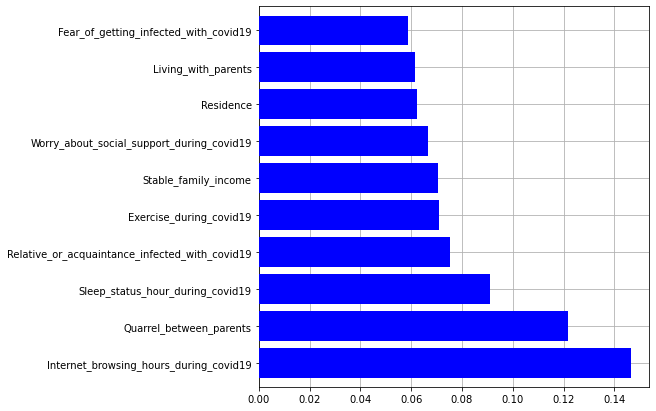

In [18]:
from sklearn.ensemble import ExtraTreesClassifier
feature = ExtraTreesClassifier()
feature.fit(x,y)
feat_impotances = pd.Series(feature.feature_importances_, index = x.columns)
plt.figure(figsize=(7,7))
feat_impotances.nlargest(10).plot(kind = 'barh',width=0.8, align='center', color='blue', zorder=5)
plt.grid(True)
plt.show()

#  Split dataset into train and test sets

In [19]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2,random_state=43 )

# Model Apply ( RF)    ( Without Oversampling & Dropping 1 Feature )

In [20]:
from sklearn.ensemble import RandomForestClassifier
rnf = RandomForestClassifier(n_estimators=20, random_state=51)
rnf.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=20, random_state=51)

In [21]:
# Accuracy on Training 
predictions_train = rnf.predict(xtrain)
print("\nTraining Accuracy : ", accuracy_score(ytrain,predictions_train))
# Accuracy on Testing
predictions_test = rnf.predict(xtest)
print("\nTesting Accuracy : ", accuracy_score(ytest,predictions_test))

# define the evaluation method
print('\nRepeated 5-Folds Cross-Validation for Model Evaluation :\n')
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(rnf, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Training Accuracy :  0.9702970297029703

Testing Accuracy :  0.7058823529411765

Repeated 5-Folds Cross-Validation for Model Evaluation :

Mean Accuracy: 0.662 (0.034)


# Univariate Selection

In [22]:
# Univariate Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

In [23]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func = f_classif, k=14)
fit = bestfeatures.fit(x,y)

In [24]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

                                          Features      Score
10                         Quarrel_between_parents  18.194640
1        Worry_about_social_support_during_covid19  17.350977
7                         Disruption_of_daily_life  13.768983
3                             Stable_family_income   7.531769
13           Fear_of_getting_infected_with_covid19   6.177596
9                                       Own_income   5.082824
6                       Worry_about_academic_delay   3.392052
8                          Exercise_during_covid19   1.628021
11                Sleep_status_hour_during_covid19   0.987650
4                              Living_with_parents   0.747179
5   Relative_or_acquaintance_infected_with_covid19   0.633973
2                                        Residence   0.299108
0                                           Gender   0.202571
12          Internet_browsing_hours_during_covid19   0.078757


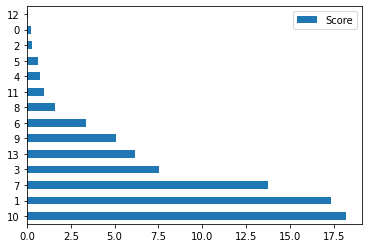

In [25]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(14,'Score')) 

featureScores = featureScores.nlargest(14,'Score')
featureScores.plot(kind ='barh')
plt.show()

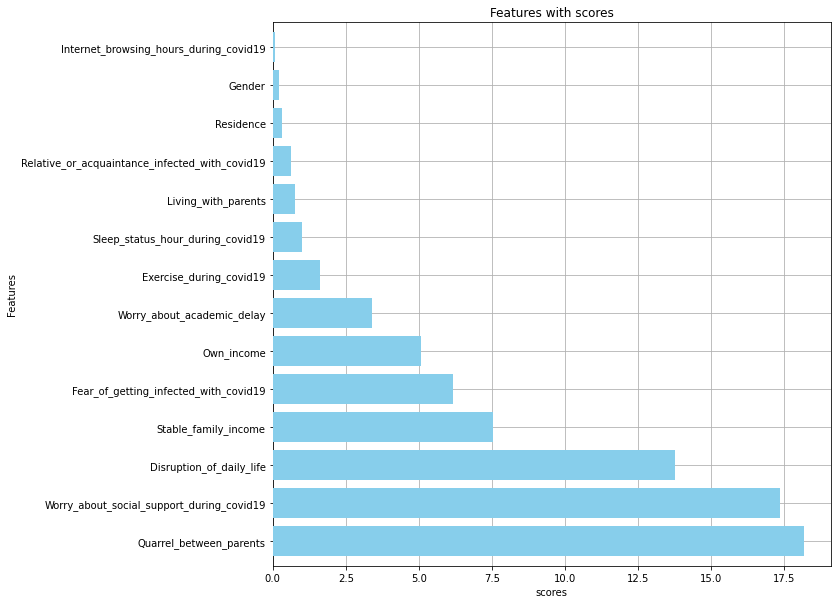

In [26]:
features = df.columns[0:14]
new_df = pd.Series(bestfeatures.scores_, features)

plt.figure(figsize=(10,10))
new_df.nlargest(14).plot(kind = 'barh',width=0.8, align='center', color='skyblue', zorder=5)
plt.ylabel("Features")
plt.xlabel("scores")
plt.title("Features with scores")
plt.grid(True)

plt.show()

# Drop 'Internet_browsing_hours_during_covid19' feature

In [27]:
x = df.drop(['Internet_browsing_hours_during_covid19','Mental_Health_Status'],axis = 1) 
x

,Gender,Worry_about_social_support_during_covid19,Residence,Stable_family_income,Living_with_parents,Relative_or_acquaintance_infected_with_covid19,Worry_about_academic_delay,Disruption_of_daily_life,Exercise_during_covid19,Own_income,Quarrel_between_parents,Sleep_status_hour_during_covid19,Fear_of_getting_infected_with_covid19
0,1,1,1,0,1,1,1,1,0,1,1,2,1
1,1,1,0,1,1,1,1,1,0,0,1,2,1
2,1,1,1,1,0,1,1,1,0,0,0,1,1
3,0,1,1,1,1,0,1,1,0,0,2,2,1
4,1,1,1,1,1,0,1,1,0,0,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1,1,1,1,1,1,1,1,1,0,1,1,1
249,1,1,0,0,1,1,1,1,0,0,1,2,1
250,1,0,1,1,1,0,1,1,0,0,1,2,1
251,1,1,0,0,0,0,1,1,0,0,1,2,1


In [28]:
y = df['Mental_Health_Status']
y

0      0
1      0
2      0
3      1
4      0
      ..
248    0
249    0
250    0
251    1
252    0
Name: Mental_Health_Status, Length: 253, dtype: int32

# Train and test sets

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state = 2021 )

In [38]:
x_train.shape

(202, 13)

# RF (Dropping 1 Feature)

# Model Performance Function

In [52]:
def model_performance(classifier):
    classifier.fit(x_train,y_train)
    # Accuracy on Training 
    predictions_train = classifier.predict(x_train)
    print("\nTraining Accuracy : ", accuracy_score(y_train,predictions_train))
    # Accuracy on Testing
    predictions_test = classifier.predict(x_test)
    print("\nTesting Accuracy : ", accuracy_score(y_test,predictions_test))

    # define the evaluation method
    print('\nRepeated 5-Folds Cross-Validation for Model Evaluation :\n')
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
    # evaluate the model on the dataset
    n_scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # report performance
    print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions_test)
    print("\nAUC Score : ",auc(false_positive_rate, true_positive_rate))
    print(classification_report(y_test,predictions_test))
    
    explainer = shap.TreeExplainer(classifier)
    shap_values = explainer.shap_values(x_test)
    shap.summary_plot(shap_values, x_test, plot_type='bar', color=['r', 'y', 'g', 'b', 'c', 'k', 
               'olive', 'gray', 'pink', 'maroon','cyan','gold','lime'])
    
#     cm = confusion_matrix(ytest,predictions_test)
#     sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[20:55:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Training Accuracy :  0.9158415841584159

Testing Accuracy :  0.803921568627451

Repeated 5-Folds Cross-Validation for Model Evaluation :

Mean Accuracy: 0.652 (0.045)

AUC Score :  0.7601010101010102
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        33
           1       0.79      0.61      0.69        18

    accuracy                           0.80        51
   macro avg       0.80      0.76      0.77        51
weighted avg       0.80      0.80      0.80        51



ntree_limit is deprecated, use `iteration_range` or model slicing instead.


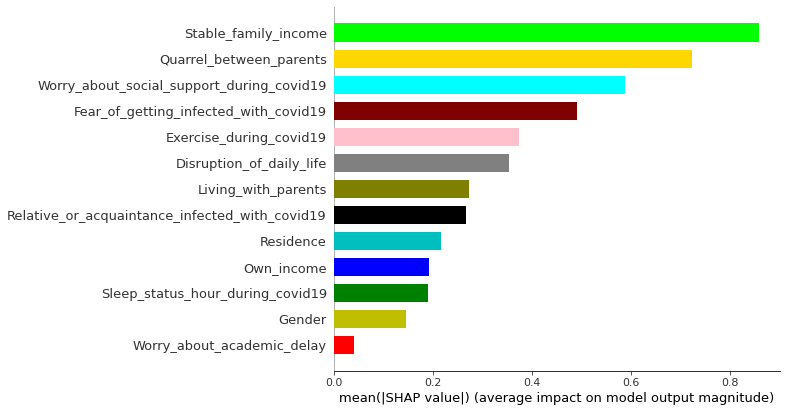

In [53]:
classifier=XGBClassifier()
model_performance(classifier)

In [54]:
svm_model = SVC(C=12,gamma = 'auto',kernel='rbf')
model_performance(svm_model)


Training Accuracy :  0.7970297029702971

Testing Accuracy :  0.7647058823529411

Repeated 5-Folds Cross-Validation for Model Evaluation :

Mean Accuracy: 0.680 (0.075)

AUC Score :  0.7171717171717171
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        33
           1       0.71      0.56      0.63        18

    accuracy                           0.76        51
   macro avg       0.75      0.72      0.73        51
weighted avg       0.76      0.76      0.76        51



Exception: Model type not yet supported by TreeExplainer: <class 'sklearn.svm._classes.SVC'>


Training Accuracy :  0.9257425742574258

Testing Accuracy :  0.8627450980392157

Repeated 5-Folds Cross-Validation for Model Evaluation :

Mean Accuracy: 0.656 (0.092)

AUC Score :  0.8181818181818181
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        33
           1       0.92      0.67      0.77        18

    accuracy                           0.86        51
   macro avg       0.88      0.82      0.84        51
weighted avg       0.87      0.86      0.86        51



TypeError: 'list' object is not callable

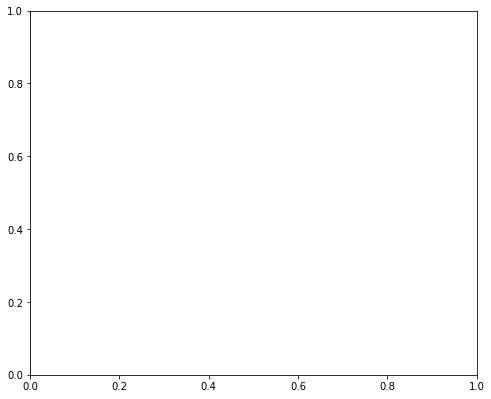

In [58]:
rnf = RandomForestClassifier(n_estimators=30, random_state=40)
model_performance(rnf)

In [35]:
model = lgb.LGBMClassifier(learning_rate=0.05,max_depth=-5,random_state=42)
model_performance(model)


Training Accuracy :  0.7524752475247525

Testing Accuracy :  0.7647058823529411

Repeated 5-Folds Cross-Validation for Model Evaluation :

Mean Accuracy: 0.699 (0.080)

AUC Score :  0.7171717171717171
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        33
           1       0.71      0.56      0.63        18

    accuracy                           0.76        51
   macro avg       0.75      0.72      0.73        51
weighted avg       0.76      0.76      0.76        51



In [168]:
catmodel = CatBoostClassifier(learning_rate=.7,iterations=100)
model_performance(catmodel)

0:	learn: 0.6361290	total: 3.8ms	remaining: 377ms
1:	learn: 0.5930089	total: 7.8ms	remaining: 382ms
2:	learn: 0.5610391	total: 9.53ms	remaining: 308ms
3:	learn: 0.5474368	total: 12.3ms	remaining: 296ms
4:	learn: 0.5303216	total: 16.1ms	remaining: 307ms
5:	learn: 0.5114807	total: 19.9ms	remaining: 312ms
6:	learn: 0.4972833	total: 23.6ms	remaining: 314ms
7:	learn: 0.4888159	total: 27.5ms	remaining: 317ms
8:	learn: 0.4642729	total: 31.4ms	remaining: 317ms
9:	learn: 0.4496834	total: 33.9ms	remaining: 305ms
10:	learn: 0.4404301	total: 36.3ms	remaining: 294ms
11:	learn: 0.4291178	total: 38.9ms	remaining: 286ms
12:	learn: 0.4216083	total: 41.4ms	remaining: 277ms
13:	learn: 0.4107412	total: 43.9ms	remaining: 269ms
14:	learn: 0.4029609	total: 46.2ms	remaining: 262ms
15:	learn: 0.3969644	total: 48.7ms	remaining: 256ms
16:	learn: 0.3896339	total: 51.2ms	remaining: 250ms
17:	learn: 0.3809089	total: 53.8ms	remaining: 245ms
18:	learn: 0.3717713	total: 56.3ms	remaining: 240ms
19:	learn: 0.3630407	tot

In [169]:
nbmodel = MultinomialNB()
model_performance(nbmodel)


Training Accuracy :  0.6732673267326733

Testing Accuracy :  0.7058823529411765

Repeated 5-Folds Cross-Validation for Model Evaluation :

Mean Accuracy: 0.680 (0.024)

AUC Score :  0.595959595959596
              precision    recall  f1-score   support

           0       0.70      0.97      0.81        33
           1       0.80      0.22      0.35        18

    accuracy                           0.71        51
   macro avg       0.75      0.60      0.58        51
weighted avg       0.73      0.71      0.65        51



In [180]:
abc = AdaBoostClassifier(n_estimators=50, learning_rate=.2)
model_performance(abc)


Training Accuracy :  0.7326732673267327

Testing Accuracy :  0.7254901960784313

Repeated 5-Folds Cross-Validation for Model Evaluation :

Mean Accuracy: 0.696 (0.055)

AUC Score :  0.6489898989898989
              precision    recall  f1-score   support

           0       0.73      0.91      0.81        33
           1       0.70      0.39      0.50        18

    accuracy                           0.73        51
   macro avg       0.72      0.65      0.66        51
weighted avg       0.72      0.73      0.70        51



In [181]:
model = GradientBoostingClassifier()
model_performance(model)


Training Accuracy :  0.8366336633663366

Testing Accuracy :  0.7843137254901961

Repeated 5-Folds Cross-Validation for Model Evaluation :

Mean Accuracy: 0.652 (0.053)

AUC Score :  0.7070707070707071
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        33
           1       0.89      0.44      0.59        18

    accuracy                           0.78        51
   macro avg       0.83      0.71      0.72        51
weighted avg       0.81      0.78      0.76        51



In [187]:
classifier= KNeighborsClassifier(n_neighbors=4, metric='minkowski', p=1 )  
model_performance(classifier)


Training Accuracy :  0.7227722772277227

Testing Accuracy :  0.7450980392156863

Repeated 5-Folds Cross-Validation for Model Evaluation :

Mean Accuracy: 0.625 (0.087)

AUC Score :  0.6515151515151515
              precision    recall  f1-score   support

           0       0.73      0.97      0.83        33
           1       0.86      0.33      0.48        18

    accuracy                           0.75        51
   macro avg       0.79      0.65      0.66        51
weighted avg       0.77      0.75      0.71        51



In [188]:
dt = DecisionTreeClassifier()
model_performance(dt)


Training Accuracy :  0.9257425742574258

Testing Accuracy :  0.7254901960784313

Repeated 5-Folds Cross-Validation for Model Evaluation :

Mean Accuracy: 0.644 (0.050)

AUC Score :  0.6868686868686869
              precision    recall  f1-score   support

           0       0.77      0.82      0.79        33
           1       0.62      0.56      0.59        18

    accuracy                           0.73        51
   macro avg       0.70      0.69      0.69        51
weighted avg       0.72      0.73      0.72        51



# With Oversampling

In [92]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X, Y = ros.fit_sample(xx, y)

In [93]:
X

,Gender,Worry_about_social_support_during_covid19,Residence,Stable_family_income,Living_with_parents,Relative_or_acquaintance_infected_with_covid19,Worry_about_academic_delay,Disruption_of_daily_life,Exercise_during_covid19,Own_income,Quarrel_between_parents,Sleep_status_hour_during_covid19,Internet_browsing_hours_during_covid19,Fear_of_getting_infected_with_covid19
0,1,1,1,0,1,1,1,1,0,1,1,2,3,1
1,1,1,0,1,1,1,1,1,0,0,1,2,4,1
2,1,1,1,1,0,1,1,1,0,0,0,1,3,1
3,0,1,1,1,1,0,1,1,0,0,2,2,3,1
4,1,1,1,1,1,0,1,1,0,0,1,3,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,1,1,0,0,1,0,1,1,0,0,1,3,2,1
328,1,1,0,1,1,1,1,1,1,0,1,2,1,1
329,1,1,0,0,1,0,1,1,0,0,1,3,2,1
330,1,1,1,1,1,1,1,1,0,0,1,2,4,1


In [94]:
Y.value_counts()

1    166
0    166
Name: Mental_Health_Status, dtype: int64

In [95]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.2,random_state = 2021 )

# RF

In [96]:
from sklearn.ensemble import RandomForestClassifier
rnf = RandomForestClassifier(n_estimators=30, random_state=40)
rnf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=30, random_state=40)

In [97]:
# Accuracy on Training 
predictions_train = rnf.predict(x_train)
print("\nTraining Accuracy : ", accuracy_score(y_train,predictions_train))
# Accuracy on Testing
predictions_test = rnf.predict(x_test)
print("\nTesting Accuracy : ", accuracy_score(y_test,predictions_test))


# # define the evaluation method
# print('\nRepeated 5-Folds Cross-Validation for Model Evaluation :\n')
# cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# # evaluate the model on the dataset
# n_scores = cross_val_score(rnf, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
# # report performance
# print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Training Accuracy :  0.9735849056603774

Testing Accuracy :  0.7910447761194029


In [86]:
X= X.drop(['Internet_browsing_hours_during_covid19'],axis = 1) 

In [87]:
Y

0      0
1      0
2      0
3      1
4      0
      ..
327    1
328    1
329    1
330    1
331    1
Name: Mental_Health_Status, Length: 332, dtype: int32

In [88]:
X

,Gender,Worry_about_social_support_during_covid19,Residence,Stable_family_income,Living_with_parents,Relative_or_acquaintance_infected_with_covid19,Worry_about_academic_delay,Disruption_of_daily_life,Exercise_during_covid19,Own_income,Quarrel_between_parents,Sleep_status_hour_during_covid19,Fear_of_getting_infected_with_covid19
0,1,1,1,0,1,1,1,1,0,1,1,2,1
1,1,1,0,1,1,1,1,1,0,0,1,2,1
2,1,1,1,1,0,1,1,1,0,0,0,1,1
3,0,1,1,1,1,0,1,1,0,0,2,2,1
4,1,1,1,1,1,0,1,1,0,0,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,1,1,0,0,1,0,1,1,0,0,1,3,1
328,1,1,0,1,1,1,1,1,1,0,1,2,1
329,1,1,0,0,1,0,1,1,0,0,1,3,1
330,1,1,1,1,1,1,1,1,0,0,1,2,1


In [89]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.2,random_state = 2021 )

In [90]:
from sklearn.ensemble import RandomForestClassifier
rnf = RandomForestClassifier(n_estimators=125, random_state=40)
rnf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=125, random_state=40)

In [91]:
# Accuracy on Training 
predictions_train = rnf.predict(x_train)
print("\nTraining Accuracy : ", accuracy_score(y_train,predictions_train))
# Accuracy on Testing
predictions_test = rnf.predict(x_test)
print("\nTesting Accuracy : ", accuracy_score(y_test,predictions_test))


Training Accuracy :  0.9433962264150944

Testing Accuracy :  0.7910447761194029


# With Oversampling (Another Method )

In [268]:
# Divide by class
class_count_0, class_count_1 = df['Mental_Health_Status'].value_counts()
df_class_0 = df[df['Mental_Health_Status'] == 0]
df_class_1 = df[df['Mental_Health_Status'] == 1]

print('class 0(Better):', df_class_0.shape)
print('class 1(Poor):', df_class_1.shape)

class 0(Better): (166, 15)
class 1(Poor): (87, 15)


1    166
0    166
Name: Mental_Health_Status, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

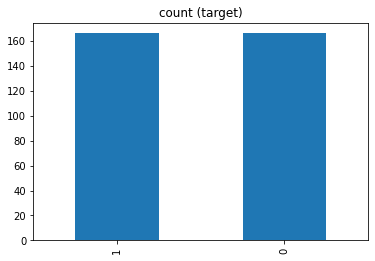

In [269]:
class_1_over = df_class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, df_class_0], axis=0)

print(test_over['Mental_Health_Status'].value_counts())

test_over['Mental_Health_Status'].value_counts().plot(kind='bar', title='count (target)')

In [271]:
x = test_over.drop(['Mental_Health_Status'], axis =1)
x

,Gender,Worry_about_social_support_during_covid19,Residence,Stable_family_income,Living_with_parents,Relative_or_acquaintance_infected_with_covid19,Worry_about_academic_delay,Disruption_of_daily_life,Exercise_during_covid19,Own_income,Quarrel_between_parents,Sleep_status_hour_during_covid19,Internet_browsing_hours_during_covid19,Fear_of_getting_infected_with_covid19
145,1,1,1,1,1,1,1,1,0,0,1,2,4,1
96,1,1,0,0,0,0,1,1,0,0,2,2,3,0
177,1,1,0,0,1,0,0,0,1,0,1,3,3,0
236,1,1,1,0,0,0,1,1,0,0,1,3,4,1
88,1,0,0,0,1,1,1,1,1,0,2,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,1,1,0,0,1,0,1,1,0,0,1,3,3,1
248,1,1,1,1,1,1,1,1,1,0,1,1,4,1
249,1,1,0,0,1,1,1,1,0,0,1,2,3,1
250,1,0,1,1,1,0,1,1,0,0,1,2,3,1


In [272]:
y = df['Mental_Health_Status']
y

0      0
1      0
2      0
3      1
4      0
      ..
248    0
249    0
250    0
251    1
252    0
Name: Mental_Health_Status, Length: 253, dtype: int32

In [273]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.2,random_state = 2021 )

In [274]:
rnf = RandomForestClassifier(n_estimators=125, random_state=40)
rnf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=125, random_state=40)

In [275]:
# Accuracy on Training 
predictions_train = rnf.predict(x_train)
print("\nTraining Accuracy : ", accuracy_score(y_train,predictions_train))
# Accuracy on Testing
predictions_test = rnf.predict(x_test)
print("\nTesting Accuracy : ", accuracy_score(y_test,predictions_test))


Training Accuracy :  0.9433962264150944

Testing Accuracy :  0.7910447761194029
